# Loan Prediction using ML Algorithm - Decision Tree, Logistic Regression, Random Forest and Neural Network

In [1]:
#Let's import all the necessary library
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the dataset 
train_data = pd.read_csv(r"C:\Users\RAJESH\OneDrive\Datascience\loan prediction\train data.csv")
test_data = pd.read_csv(r"C:\Users\RAJESH\OneDrive\Datascience\loan prediction\test data.csv")

In [3]:
#print information about the train dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here, we can see the information that contains the number of columns, column labels, data types, memory usage, range index and the number of cells in each column (non-null values).


In [4]:
#information about test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
#use .head() function to see the first few rows from data
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [6]:
#use .tail() to see the last rows from dataset
test_data.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [7]:
#returns description of the dataframe
train_data.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [8]:
#numerical data description with count, mean, std, quartiles, min and max
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
#checking the total number of rows and columns using len function
print( 'Train data contains:','Rows: ', len(train_data), 'Columns: ', len(train_data.columns) )
print('Test data contains:','Rows: ', len(test_data), 'Columns: ', len(test_data.columns))

Train data contains: Rows:  614 Columns:  13
Test data contains: Rows:  367 Columns:  12


**Also we can get the shape of the dataset by simply using the shape attribute which you can see in below code**

In [10]:
print('Shape: ', train_data.shape)
print('Shape: ', test_data.shape)

Shape:  (614, 13)
Shape:  (367, 12)


In the above information, we can see that the number of columns in train data is 13 with the loan status feature, in test data we are going to predict the loan status so there are only 12 columns.

In [11]:
#counting the value from 'Loan Status' column
train_data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

According to the train dataset, 435 people get the loan approval from the bank whereas 196 were rejected.

# Checking the null values


**Let's check if there is any null values or missing values using the isnull function**

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#total number of the null values count
train_data.isna().sum().sum()

149

In [14]:
#there are 152 null values in the train data set
# now we will see the  percentage of null values in the train data  set
(train_data.isna().sum().sum()/train_data.size)*100

1.8667000751691305

In [15]:
#similarly for the test dataset
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
#total no of the null values count
test_data.isna().sum().sum()

84

In [17]:
#there are 84 null values in the test data set
# now we will see the  percentage of null values in the test data  set
(test_data.isna().sum().sum()/test_data.size)*100

1.9073569482288828

# Remove duplicates data


In [18]:
#checking duplicates data
train_data.duplicated().sum()

0

In [19]:
#remove duplicates
train_data = train_data.drop_duplicates()
train_data.shape

(614, 13)

In [20]:
test_data.duplicated().sum()


0

There were 17 duplicates in train dataset so we removed

# Fill the missing data with the mode value


In [21]:
#adding mode values in null places for train dataset 

print('Before filling missing values\n\n', '#'*40, '\n')
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{train_data[col].value_counts()}\n", "-"*50)
    train_data[col] = train_data[col].fillna( train_data[col].dropna().mode().values[0])
    

train_data.isnull().sum().sort_values(ascending = False)
print("After filling the missing values \n\n", "#"*50, "\n")
for col in null_cols:
    print(f"\n{col}:\n{train_data[col].value_counts()}\n", "-"*50)

Before filling missing values

 ######################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      489
Female

In [22]:
#adding mode values in null places for test dataset also

print('Before filling missing values in test dataset\n\n', '#'*40, '\n')
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{test_data[col].value_counts()}\n", "-"*50)
    test_data[col] = test_data[col].fillna( test_data[col].dropna().mode().values[0])
    

test_data.isnull().sum().sort_values(ascending = False)
print("After filling the missing values \n\n", "#"*50, "\n")
for col in null_cols:
    print(f"\n{col}:\n{test_data[col].value_counts()}\n", "-"*50)

Before filling missing values in test dataset

 ######################################## 

Credit_History:
Credit_History
1.0    279
0.0     59
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     307
Yes     37
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: count, Length: 144, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64
 --------------------------------------------

In [23]:
# After filling mode to the null values 

print(f"After filling null values\n",'-'*50)
train_data.isnull().sum().sort_values(ascending=False)

After filling null values
 --------------------------------------------------


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
# After filling the null values in test dataset 

print(f"After filling null values\n",'-'*50)
test_data.isnull().sum().sort_values(ascending=False)

After filling null values
 --------------------------------------------------


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

By now, we can see there is no any null or missing values, that means data is clean now.


# Remove unnecessary columns or features

Let's drop the column 'Loan_ID' which will not have any use from both the test and train datasets

In [25]:
#dropping the unwanted column

train_data.drop('Loan_ID', axis=1, inplace = True)
test_data.drop('Loan_ID', axis = 1, inplace = True)

#checking the new samples

print('Training set : ', train_data.shape, ' Testing set: ', test_data.shape)

Training set :  (614, 12)  Testing set:  (367, 11)


#  Data Visualization
 

First we need to separate our dataset into categorical and numerical values using the .select_dtypes('dtype').columns.to_list() combination.

In [26]:
# Numerical values 
num = train_data.select_dtypes('number').columns.to_list()

#Categorical values 
cat = train_data.select_dtypes('object').columns.to_list()

#Dataset 
loan_num = train_data[num]
loan_cat = train_data[cat]

In [27]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [28]:
loan_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


Loan_Status
Y    422
N    192
Name: count, dtype: int64


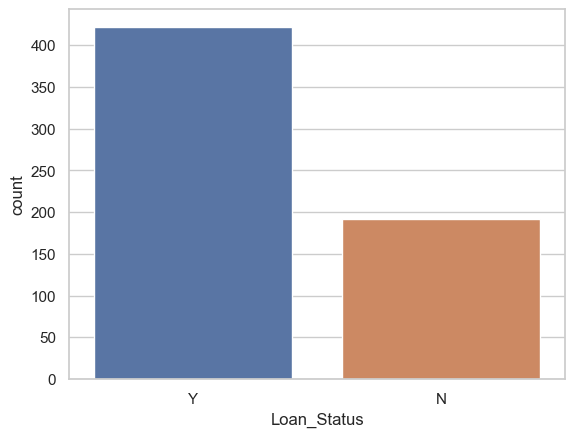

In [29]:
# Lets plot the Loan_Status column to know the propotion of accepted and rejected proposals

print(train_data[cat[-1]].value_counts())
sns.set(style="whitegrid")
sns.countplot(x=train_data[cat[-1]])
plt.show()

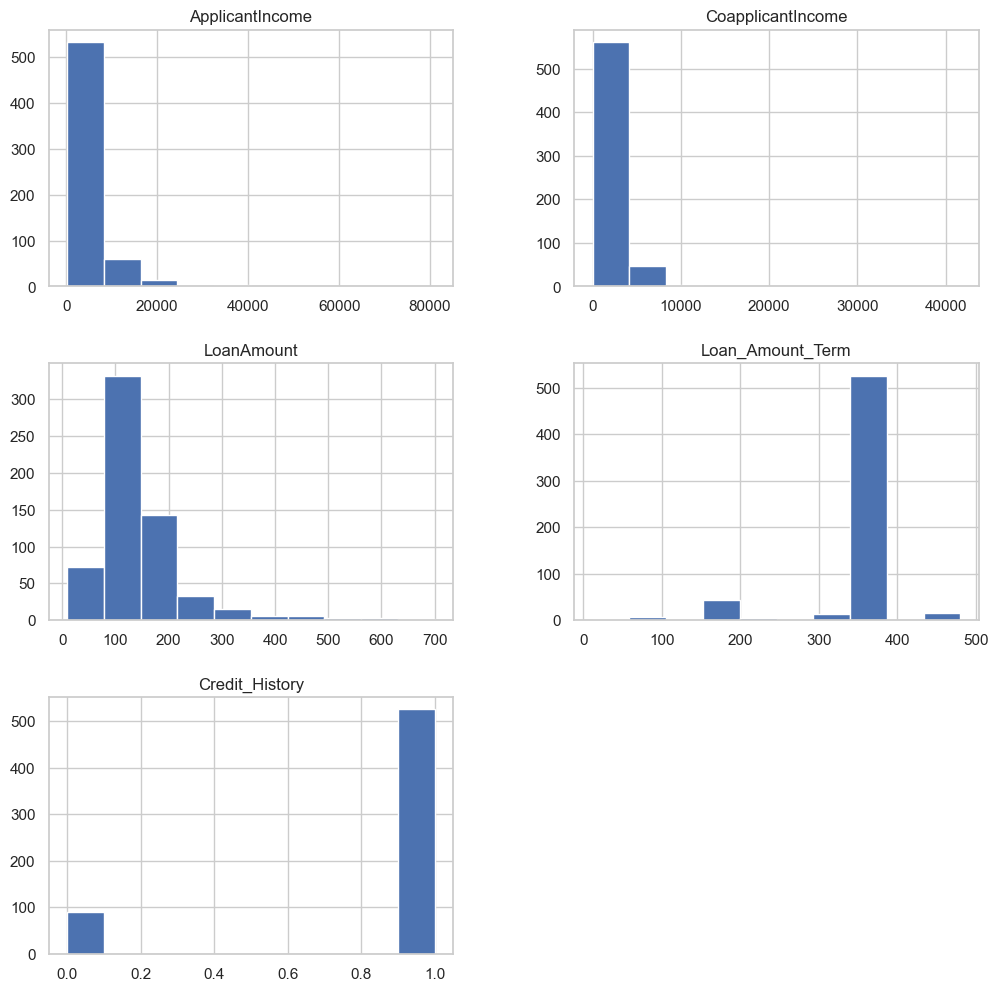

In [30]:
# plot histograms for numeric variable
train_data.hist(figsize = (12, 12))
plt.show()

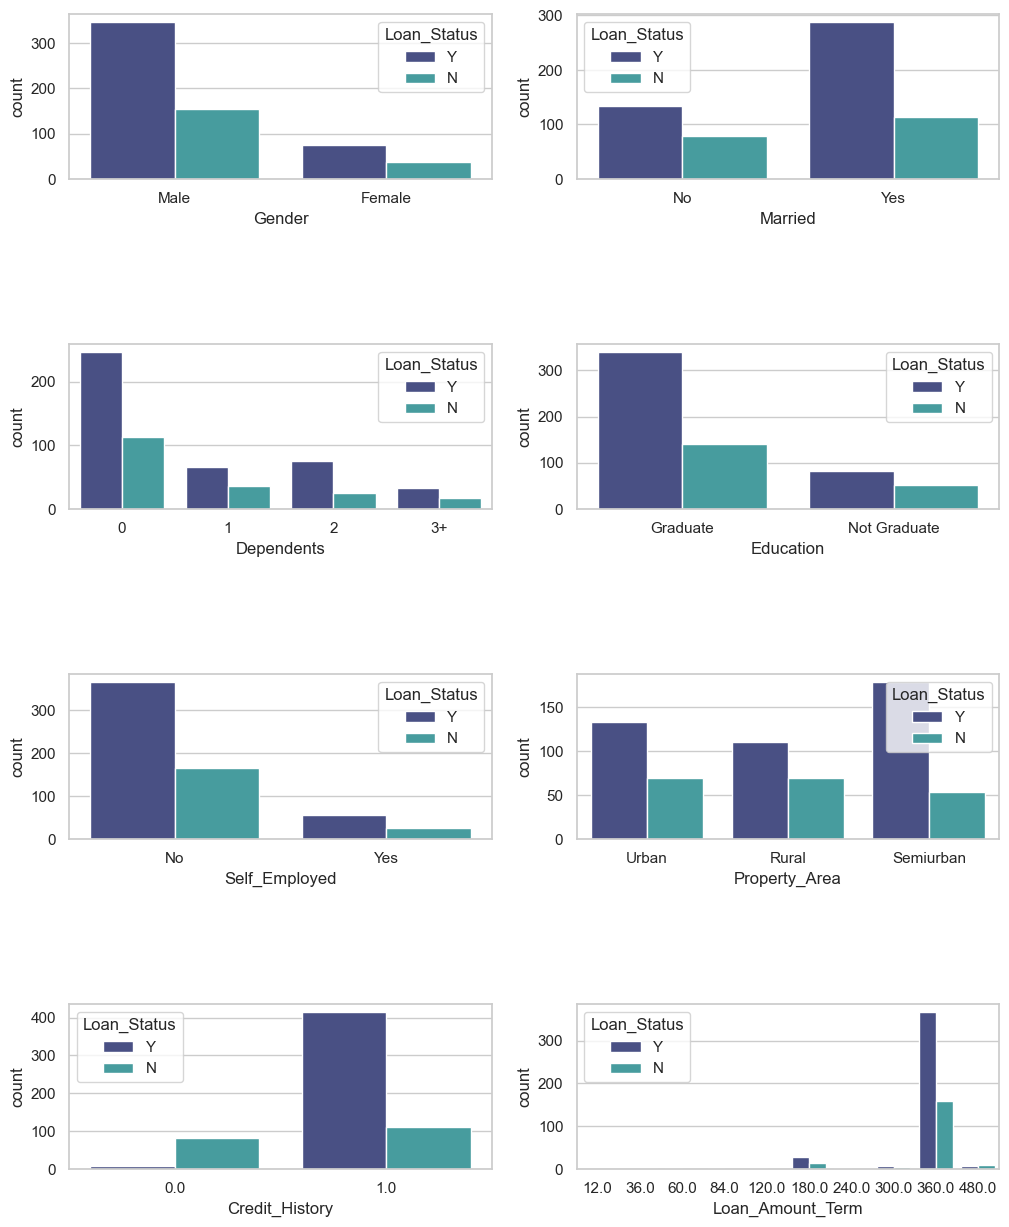

In [31]:
#Categorical Value Plots

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data,hue='Loan_Status',ax=axes[row,col], palette='mako')


plt.subplots_adjust(hspace=1)

Information about the training dataset:
Loan Approval Status: About 2/3rd of applicants have been granted loan.

Sex: There are more Men than Women (approx. 3x)
Martial Status: 2/3rd of the population in the dataset is Married; Married applicants are more likely to be granted loans.
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
Employment: 5/6th of population is not self employed.
Property Area: More applicants from Semi-urban and also likely to be granted loans.
Applicant with credit history are far more likely to be accepted.
Loan Amount Term: Majority of the loans taken are for 360 Months (30 year

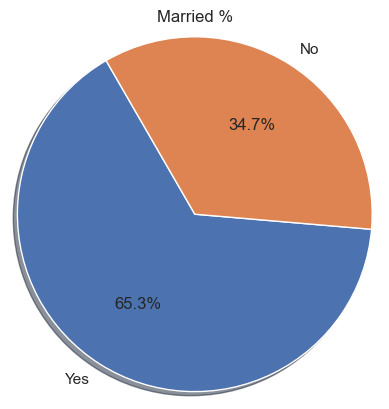

In [32]:
#We can also visualize in pie chart using the plt.pie function

plt.pie(train_data["Married"].value_counts(),shadow=True,autopct="%1.1f%%",radius=1.2,startangle=120,labels=["Yes","No"])
plt.title("Married %")
plt.show()

Text(0.5, 1.0, 'Target distribution')

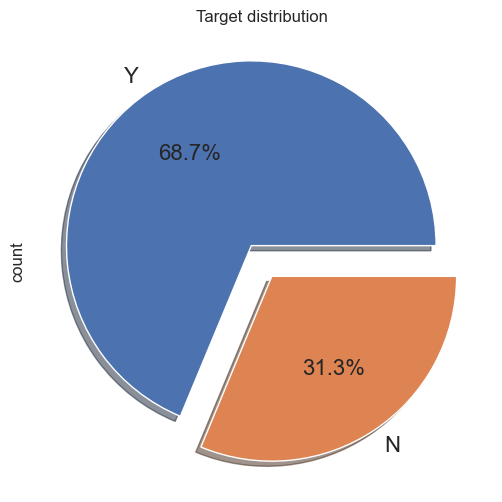

In [33]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train_data['Loan_Status'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

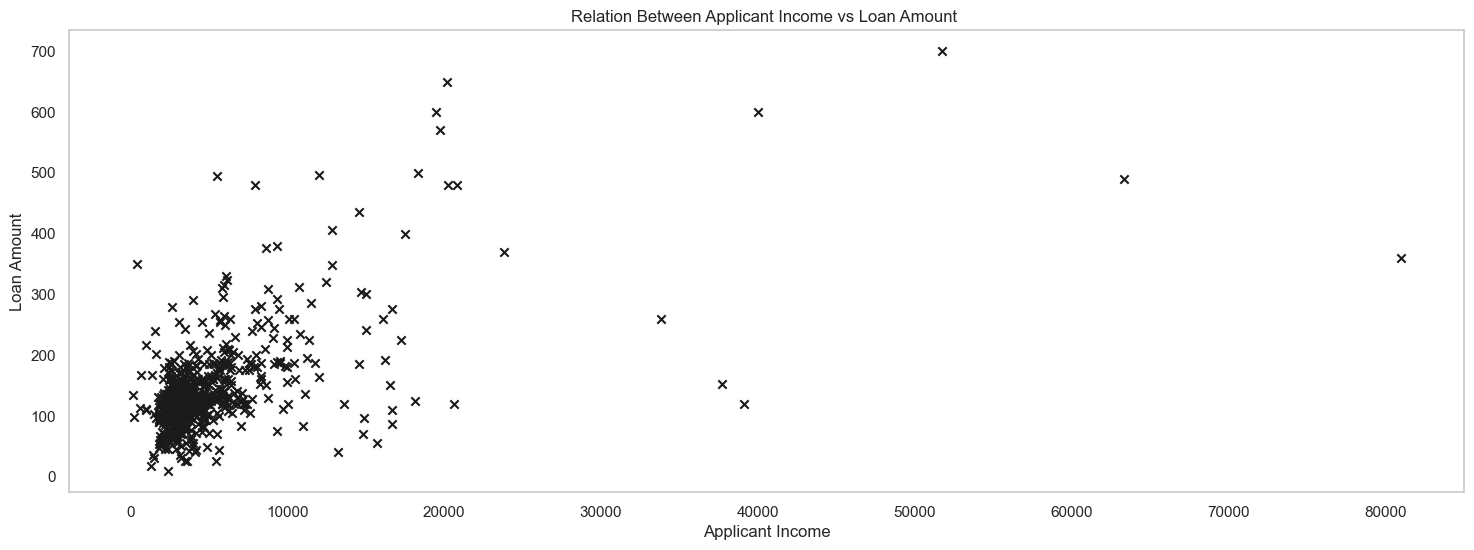

In [34]:
#scatter plot
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(train_data['ApplicantIncome'] , train_data['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

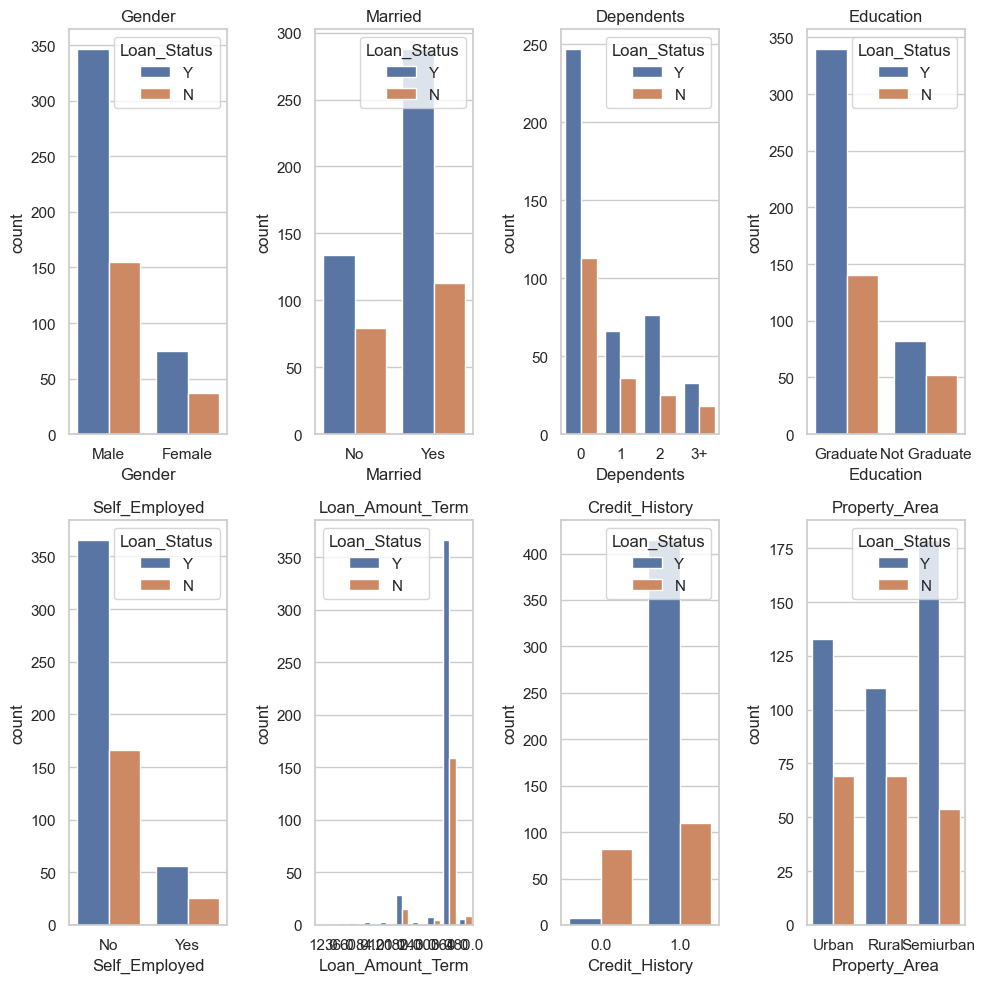

In [35]:
# Improve appearance 

cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(data=train_data, x=var_name, axes=ax, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

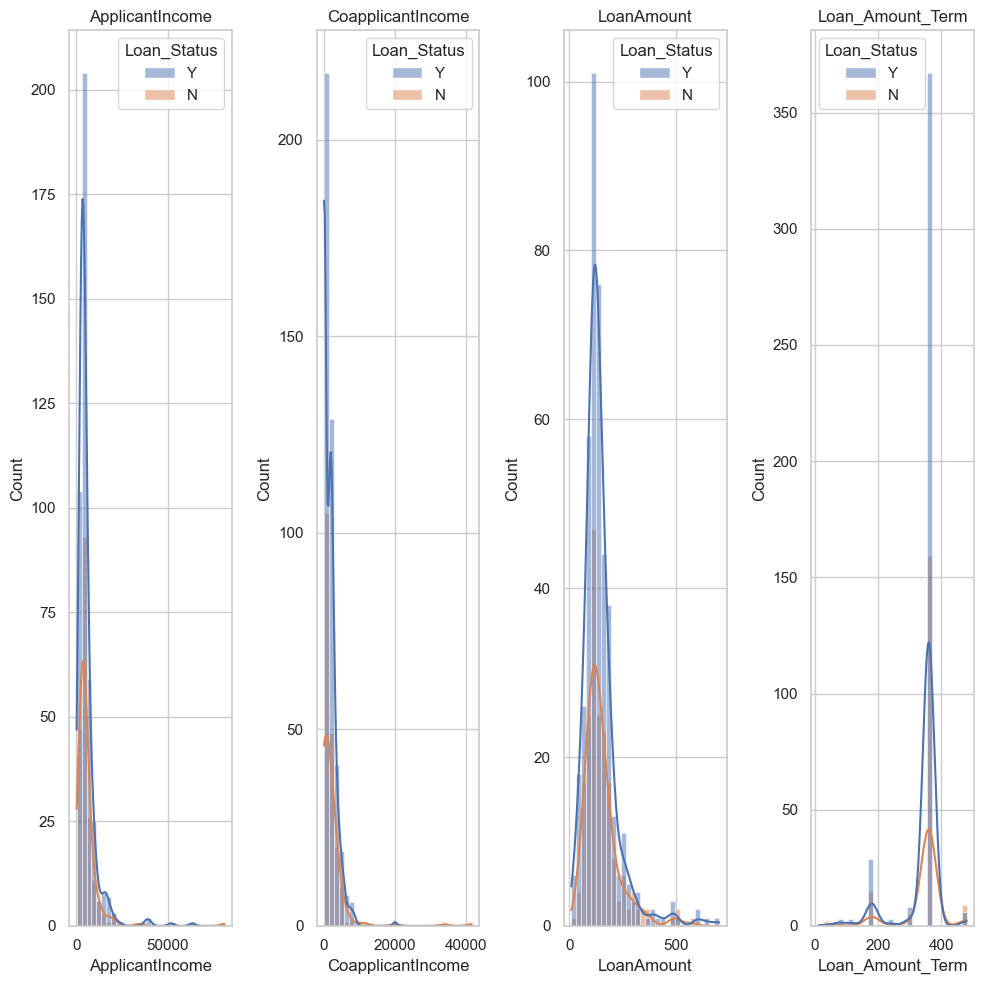

In [36]:
con_feats=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(con_feats):
    # Right plot (truncated)
    ax=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=True, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

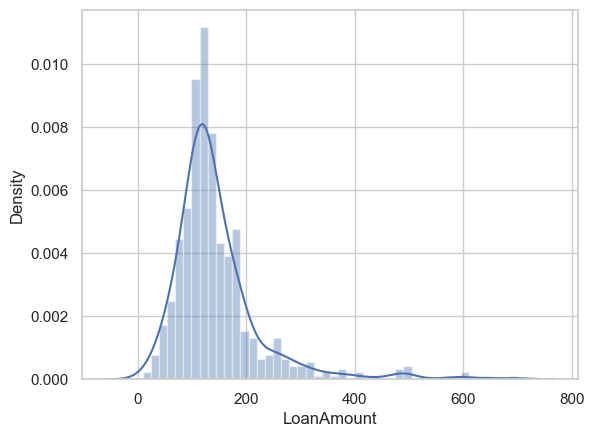

In [37]:
sns.distplot(train_data["LoanAmount"]);


<Axes: >

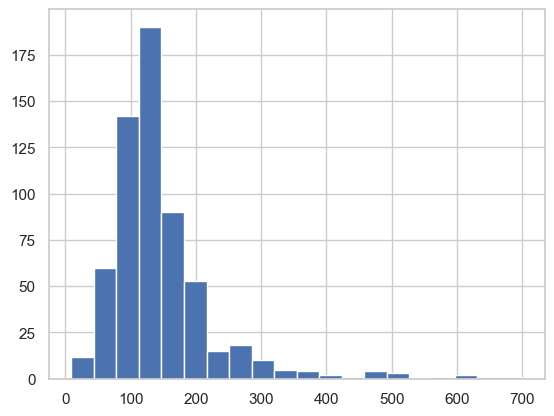

In [38]:
train_data['LoanAmount'].hist(bins=20)


Now, let's remove the skeweness by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

<Axes: >

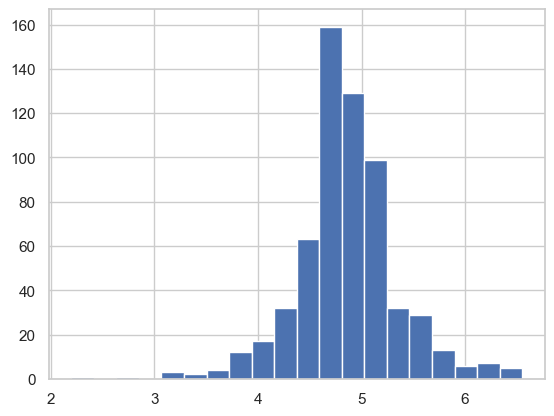

In [39]:
train_data['LoanAmount'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount', ylabel='Density'>

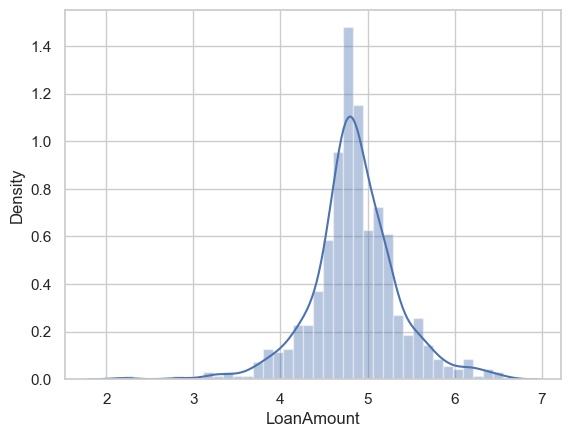

In [40]:
sns.distplot(train_data["LoanAmount"])


<Axes: >

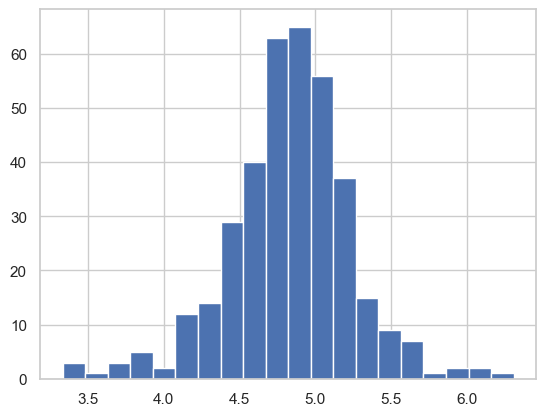

In [41]:
#Let's have a look in test set [LoanAmount]


test_data["LoanAmount"]=np.log(test_data["LoanAmount"])
test_data['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount', ylabel='Density'>

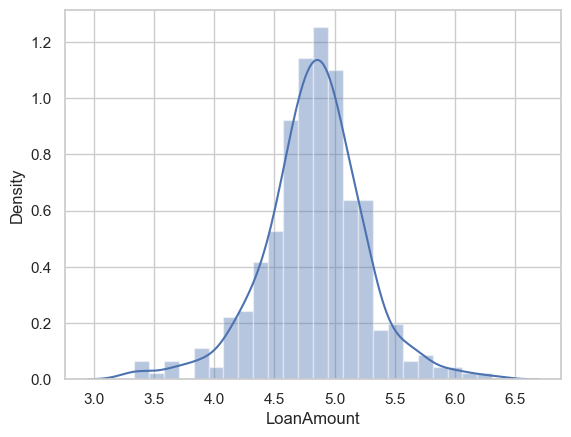

In [42]:
sns.distplot(test_data["LoanAmount"])


In [43]:
# convert Categorical variable with Numerical values.
train_data.Loan_Status = train_data.Loan_Status.replace({"Y": 1, "N" : 0})
# test_data.Loan_Status = test_data.Loan_Status.replace({"Y": 1, "N" : 0}) 

train_data.Gender = train_data.Gender.replace({"Male": 1, "Female" : 0})
test_data.Gender = test_data.Gender.replace({"Male": 1, "Female" : 0})

train_data.Married = train_data.Married.replace({"Yes": 1, "No" : 0})
test_data.Married = test_data.Married.replace({"Yes": 1, "No" : 0})

train_data.Self_Employed = train_data.Self_Employed.replace({"Yes": 1, "No" : 0})
test_data.Self_Employed = test_data.Self_Employed.replace({"Yes": 1, "No" : 0})

In [44]:
#Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [45]:
#Another method to represent categorical variables to numeric data is hot encoding

'''#Encoding using get_dummies OneHotEncoder
train_data=pd.get_dummies(train_data,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
train_data.head()'''

'#Encoding using get_dummies OneHotEncoder\ntrain_data=pd.get_dummies(train_data,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])\ntrain_data.head()'

In [46]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,4.787492,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,4.262680,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,3.688879,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,5.533389,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,5.231109,360.0,1.0,2,1


In [47]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,4.700480,360.0,1.0,2
1,1,1,1,0,0,3076,1500,4.836282,360.0,1.0,2
2,1,1,2,0,0,5000,1800,5.337538,360.0,1.0,2
3,1,1,2,0,0,2340,2546,4.605170,360.0,1.0,2
4,1,0,0,1,0,3276,0,4.356709,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,4.727388,360.0,1.0,2
363,1,1,0,0,0,4158,709,4.744932,360.0,1.0,2
364,1,0,0,0,0,3250,1993,4.836282,360.0,1.0,1
365,1,1,0,0,0,5000,2393,5.062595,360.0,1.0,0


# Correlation Matrix

<Axes: >

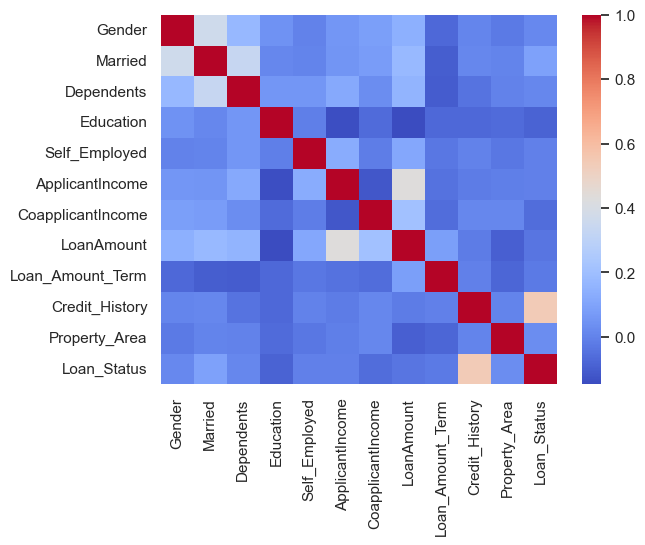

In [48]:
# Ploting the correaltion matrix
sns.heatmap(train_data.corr() ,cmap='coolwarm')

In [49]:
# Correlation table for better view
corr = train_data.corr()

corr.style.background_gradient(cmap="coolwarm")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.142783,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.179459,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.156762,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.146964,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.109601,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.435261,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.207177,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.142783,0.179459,0.156762,-0.146964,0.109601,0.435261,0.207177,1.000000,0.085630,-0.018052,-0.096343,-0.036099
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.085630,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.018052,-0.004705,1.000000,0.001963,0.540556


**Conclusion from Correlation Matrix:**

From the above two correlation matrix, we can see that credit history has a positive correlation of 0.540556 with the target value Loan_Status. Looking at this, we can say that Loan_Status is more dependent on Credit_History.

#  Machine Learning Algorithms

In [50]:
#relevant ML libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [51]:
# Split the train data into features and target
X_train = train_data.drop('Loan_Status', axis=1).values
y_train = train_data['Loan_Status'].values

In [52]:
# Split the test data into features and target
X_pred = test_data.values

In [53]:
# Preprocess the data (e.g. normalize, standardize, etc.)
X_train = (X_train - X_train.mean()) / X_train.std()
X_pred = (X_pred - X_pred.mean()) / X_pred.std()

In [54]:
# Split the training dataset into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# 1. Decision Tree Classifier 


In [55]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
tree_model = DecisionTreeClassifier(random_state=1)


In [57]:
#fit the model
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [58]:
y_pred = tree_model.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_model,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_model,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6788248995679739
Validation Mean Accuracy:  0.7250068399452804


In [59]:
pred=tree_model.predict(X_test)
pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [60]:
Accuracy =accuracy_score(pred,y_test)*100
Accuracy


71.35135135135135

In [61]:
#Let’s make predictions for the test dataset.

pred_test = tree_model.predict(X_pred)
pred_test[16:20]

array([0, 0, 1, 0], dtype=int64)

In [62]:
#checking the r squared value through this model
r2 = tree_model.score(X_test, y_test)
r2

0.7135135135135136

# 2. Logistic Regression 


In [63]:
from sklearn.linear_model import LogisticRegression


In [64]:
logistic_model = LogisticRegression()


In [65]:
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [66]:
# Predict the model for testing data of train_test split set
y_pred = logistic_model.predict(X_test)

In [67]:
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        61
           1       0.67      1.00      0.81       124

    accuracy                           0.68       185
   macro avg       0.84      0.51      0.42       185
weighted avg       0.78      0.68      0.55       185

[[  1  60]
 [  0 124]]
LR accuracy: 67.57%


In [68]:
r2 = logistic_model.score(X_test, y_test)
r2

0.6756756756756757

In [69]:
# Predict the model for testin data

predicted = logistic_model.predict(X_pred)

In [70]:
predicted
predicted[16:20]

array([1, 1, 1, 1], dtype=int64)

In [71]:
#Training the model with few key features now

train_features = ['Credit_History', 'Gender', 'ApplicantIncome']

X_train = train_data[train_features].values
y_train = train_data['Loan_Status'].values

X_pred = test_data[train_features].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [72]:
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [73]:
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        41
           1       0.75      1.00      0.86        82

    accuracy                           0.78       123
   macro avg       0.88      0.67      0.68       123
weighted avg       0.83      0.78      0.74       123

[[14 27]
 [ 0 82]]
LR accuracy: 78.05%


In [74]:
# Predict the model for testin data

predicted = logistic_model.predict(X_pred)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [75]:
r2 = logistic_model.score(X_test, y_test)
r2

0.7804878048780488

# 3. Random Forest Classifier


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8692307692307693
Train Accuracy  0.8017492711370262
Validation Mean F1 Score:  0.7278299448748948
Validation Mean Accuracy:  0.8018329070758737


In [78]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8513513513513513
Test F1 Score:  0.9067796610169491
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,19,22,41
1,0,107,107
All,19,129,148


In [79]:
pred_test = rf_clf.predict(X_pred)


In [80]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [81]:
len(pred_test)

367

In [82]:
r2 = rf_clf.score(X_test, y_test)
r2

0.8513513513513513

In [88]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1f/97/dec9dfa95cfbee631adffbeb0b7eda51ddc93a5f7e8aa8f4d95dde59e69e/tensorflow-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.2 from https://files.pythonhosted.org/packages/46/87/c3e4e9fe7c630f38a6984afdd1d4ed531ef9c74dc66b86f46f6bdd89d608/tensorflow_intel-2.16.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtainin

# 4. Neural Network


In [89]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

In [90]:
# Split the train data into features and target
X = train_data.drop('Loan_Status', axis=1).values
y = train_data['Loan_Status'].values

# predicting dataset
X_pred = test_data.values

# Preprocess the data (e.g. normalize, standardize, etc.)
X = (X - X.mean()) / X.std()
X_pred = (X_pred - X_pred.mean()) / X_pred.std()

In [91]:
# Split the training dataset into a training set and a validation set
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2)

In [92]:
#create the Neural Network Model 

model = tf.keras.models.Sequential()

#Hidden layer (2 neurons) + Input Layer (11 inputs)
model.add(tf.keras.layers.Dense(32, input_dim = 11, activation = 'sigmoid'))

#2nd Hidden layer with 20 neurons
model.add(tf.keras.layers.Dense(16, activation = 'sigmoid'))

#Output layer 1 output

model.add(tf.keras.layers.Dense(1))

In [93]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

In [95]:
# Train the model
history = model.fit(X, y, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.7139 - loss: 0.6526 - val_acc: 0.6992 - val_loss: 0.3119
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6749 - loss: 0.2866 - val_acc: 0.6911 - val_loss: 0.2190
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7043 - loss: 0.2121 - val_acc: 0.6585 - val_loss: 0.2230
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6546 - loss: 0.2254 - val_acc: 0.6829 - val_loss: 0.2200
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6745 - loss: 0.2183 - val_acc: 0.6911 - val_loss: 0.2175


In [96]:
# Evaluate the model on the validation set
_, val_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc:.3f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7368 - loss: 0.1940 
Validation Accuracy: 0.691


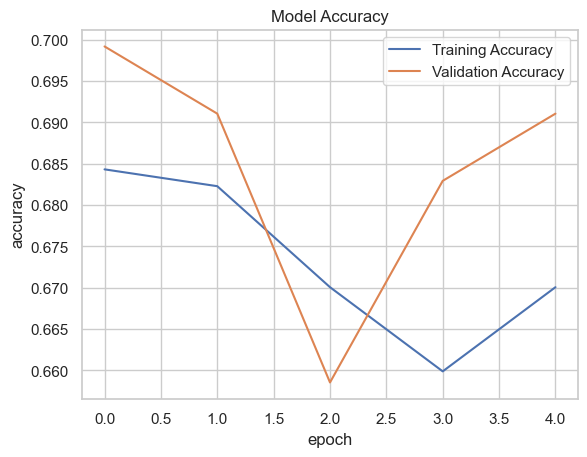

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

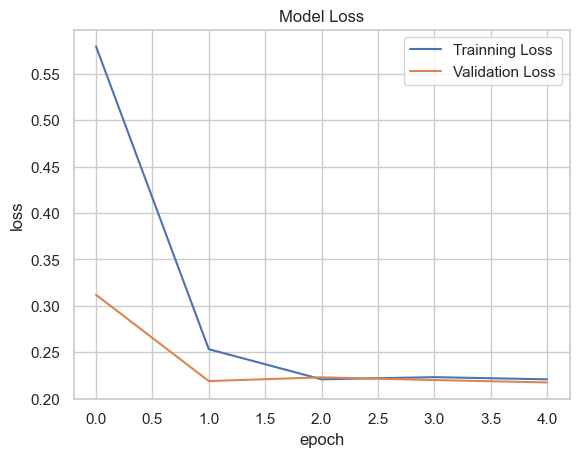

In [98]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Trainning Loss', 'Validation Loss'])
plt.show()

In [99]:
# Make predictions on the test set
pred_test = model.predict(X_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [100]:
pred_test[24]

array([0.6845591], dtype=float32)

**Looking at all the algorithms, we can see that Random Forest Classifier has the highest accuracy of 84.45%.**